In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

## 3.2.1生成数据集

In [2]:
def synthetic_data(w,b,num_examples): #@save
    """生成y=Xw+b+噪声"""
    X=torch.normal(0,1,(num_examples,len(w)))
    y=torch.matmul(X,w)+b
    y+=torch.normal(0,0.01,y.shape)
    return X,y.reshape((-1,1))

true_w=torch.tensor([2,-3.4])
true_b=4.2
features,labels=synthetic_data(true_w,true_b,1000)

In [3]:
print('features:',features[0],'\nlabel:',labels[0])

features: tensor([-1.2284, -0.8999]) 
label: tensor([4.7900])


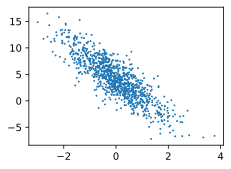

In [4]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1)

## 3.2.2读取数据集

In [5]:
def data_iter(batch_size,features,labels):
    num_examples=len(features)
    indices=list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices=torch.tensor(indices[i:min(i+batch_size,num_examples)])
        yield features[batch_indices],labels[batch_indices]

In [6]:
batch_size=10
for X,y in data_iter(batch_size,features,labels):
    print(X,'\n',y)
    break


tensor([[-0.9406, -1.2454],
        [-0.2337, -0.2982],
        [-1.7368, -0.3558],
        [-1.4827, -0.1583],
        [-1.5123,  0.0038],
        [-0.7770, -0.6090],
        [-2.2248, -0.2545],
        [-1.3515,  0.7877],
        [ 0.9776,  0.3886],
        [ 1.8946, -0.1655]]) 
 tensor([[ 6.5584],
        [ 4.7601],
        [ 1.9229],
        [ 1.7580],
        [ 1.1340],
        [ 4.7272],
        [ 0.6033],
        [-1.1933],
        [ 4.8396],
        [ 8.5565]])


## 3.2.3初始化模型参数

In [7]:
w=torch.normal(0,0.01,size=(2,1),requires_grad=True)
b=torch.zeros(1,requires_grad=True)

## 3.2.4定义模型

In [8]:
def linreg(X,w,b):  #@save
    """线性回归模型"""
    return torch.matmul(X,w)+b

## 3.2.5定义损失函数

In [9]:
def squared_loss(y_hat,y):   #@save
    """均方损失"""
    return (y_hat-y.reshape(y_hat.shape))**2/2

## 3.2.6定义优化算法

In [10]:
def sgd(params,lr,batch_size):  #@save
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param-=lr*param.grad/batch_size
            param.grad.zero_()

## 3.2.7训练

In [11]:
lr=0.03
num_epochs=3
net=linreg
loss=squared_loss
for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l=loss(net(X,w,b),y)    # X和y的小批量损失
        # 因为l形状是(batch_size,1),而不是一个标量，l中的所有元素被加到一起
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w,b],lr,batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l=loss(net(features,w,b),labels)
        print(f'epoch{epoch+1},loss{float(train_l.mean()):f}')

epoch1,loss0.040596
epoch2,loss0.000160
epoch3,loss0.000051


In [12]:
print(f'w的估计误差：{true_w-w.reshape(true_w.shape)}')
print(f'b的估计误差：{true_b-b}')

w的估计误差：tensor([ 9.7275e-05, -3.5930e-04], grad_fn=<SubBackward0>)
b的估计误差：tensor([0.0003], grad_fn=<RsubBackward1>)
